<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [2]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
full = pd.concat([X, pd.DataFrame(y)], axis=1)
full.rename(columns={0: 'MEDV'}, inplace=True)
full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(X.shape)
X.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
print(y.shape)

(506,)


**Note**: A quick search on the Internet provides the following:

* CRIM - per capita crime rate by town

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS - proportion of non-retail business acres per town.

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* NOX - nitric oxides concentration (parts per 10 million)

* RM - average number of rooms per dwelling

* AGE - proportion of owner-occupied units built prior to 1940

* DIS - weighted distances to five Boston employment centres

* RAD - index of accessibility to radial highways

* TAX - full-value property-tax rate per 10,000

* PTRATIO - pupil-teacher ratio by town

* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

* LSTAT - pct_lower status of the population

* MEDV - Median value of owner-occupied homes in 1000's

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# Check X
print(X.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

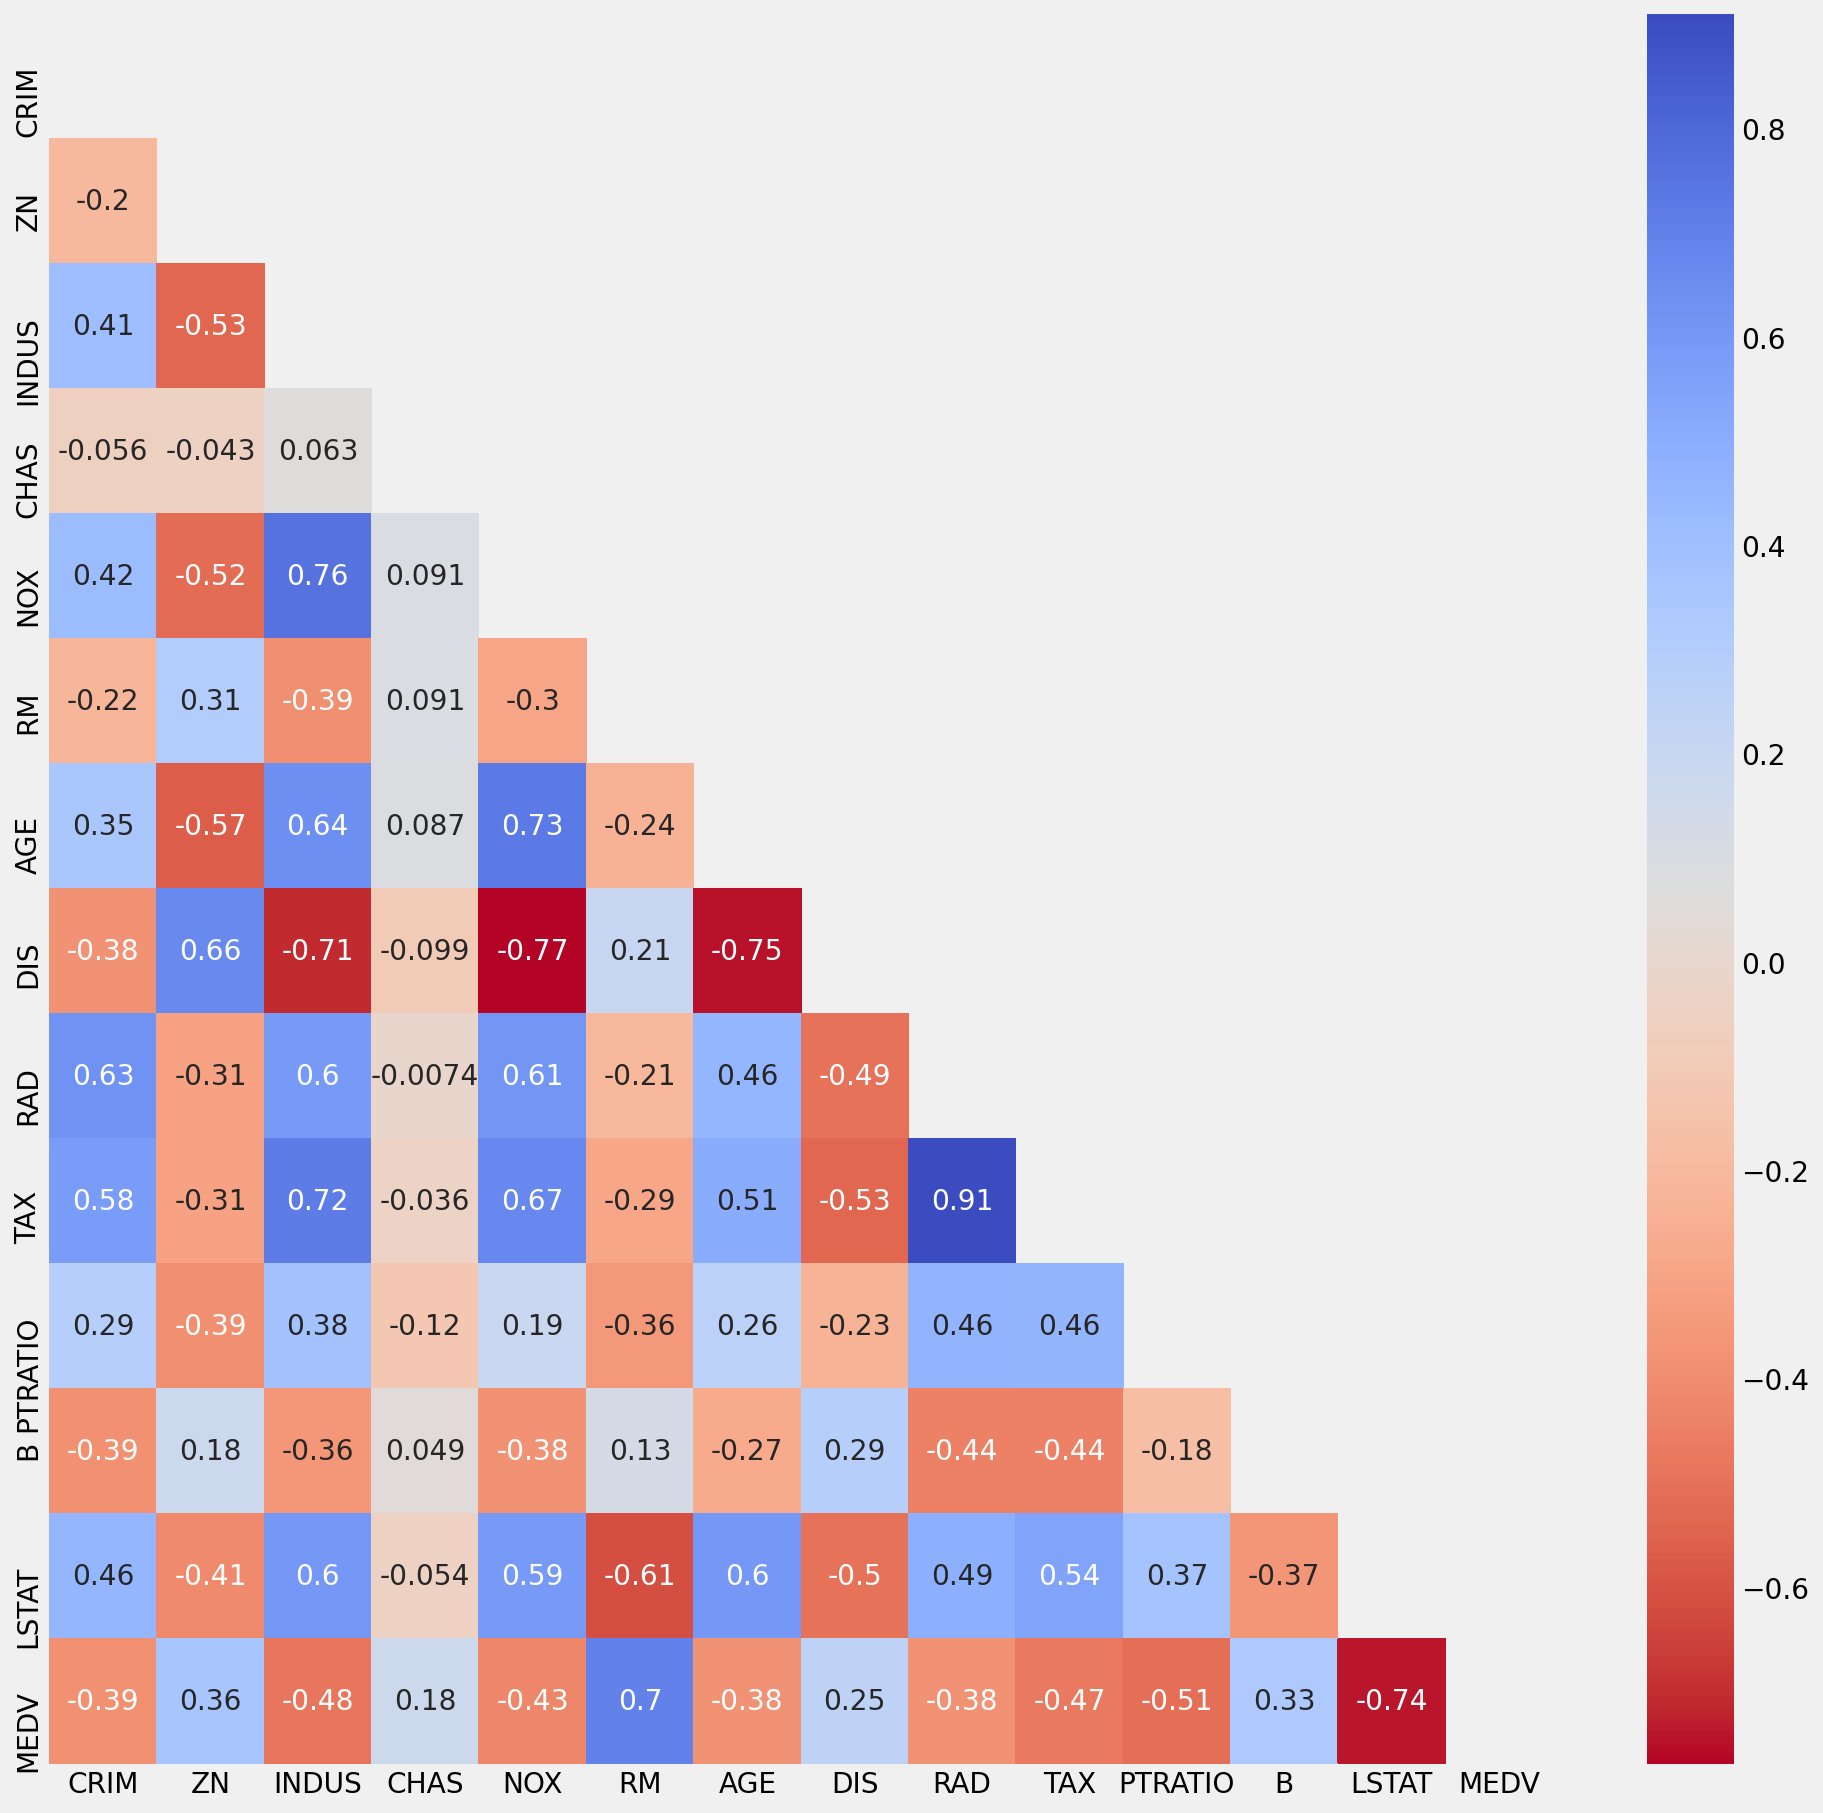

In [10]:
plt.figure(figsize=(15,15))
corr = full.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot = True, cmap='coolwarm_r')
plt.show()

In [17]:
# Quick correlation map
features = full.corr()['MEDV']
features_sub = features[(abs(features.values) >= 0.5) & 
                        (abs(features.values) != 1)]

features_sub

RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

**Note**: Based on the underlying correlations above, we will select RM, LSTAT, PTRATIO

In [18]:
# Split dataset into training (0.5) and testing (0.5) datasets
X_train, X_test, y_train, y_test = train_test_split(X[features_sub.index], y, 
                                                    random_state=123, test_size=0.5)

In [19]:
# Check length of dataset
print(f'Train: {len(X_train)}, Test: {len(X_test)}')

Train: 253, Test: 253


In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Train score
print(f'R2 based on training dataset: {lr.score(X_train, y_train)}')
print(f'R2 based on test dataset: {lr.score(X_test, y_test)}')

R2 based on training dataset: 0.6928816799900688
R2 based on test dataset: 0.6598192473737049


### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

Let's first do the 70-30 split.

**Initial thoughts**: R2 should be higher for the model based on the training dataset

In [22]:
# Splitting dataset into training (0.7) and testing (0.3) datasets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[features_sub.index], y, 
                                                    random_state=123, test_size=0.3)

In [23]:
# Check length of dataset
print(f'Train: {len(X_train2)}, Test: {len(X_test2)}')

Train: 354, Test: 152


In [24]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

In [25]:
# Train score
print(f'R2 based on training dataset: {lr2.score(X_train2, y_train2)}')
print(f'R2 based on test dataset: {lr2.score(X_test2, y_test2)}')

R2 based on training dataset: 0.7234674036999682
R2 based on test dataset: 0.555978494762042


Let's first do the 90-10 split.

**Initial thoughts**: R2 should *still* be higher for the model based on the training dataset

In [26]:
# Splitting dataset into training (0.9) and testing (0.1) datasets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X[features_sub.index], y, 
                                                    random_state=123, test_size=0.1)

In [27]:
# Check length of dataset
print(f'Train: {len(X_train3)}, Test: {len(X_test3)}')

Train: 455, Test: 51


In [28]:
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)

LinearRegression()

In [29]:
# Train score
print(f'R2 based on training dataset: {lr3.score(X_train3, y_train3)}')
print(f'R2 based on test dataset: {lr3.score(X_test3, y_test3)}')

R2 based on training dataset: 0.6966555653294185
R2 based on test dataset: 0.5413066022909152


### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [30]:
# CVs for 50-50 train-test split
for i in range(5,11):
    print(f'cv={i}: {cross_val_score(lr, X_train, y_train, cv=i).mean()}')

cv=5: 0.6724442202741454
cv=6: 0.6569158176951169
cv=7: 0.6717317679607778
cv=8: 0.6662821008941232
cv=9: 0.6647260189076261
cv=10: 0.672388300154452


In [31]:
# CVs for 70-30 train-test split
for i in range(5,11):
    print(f'cv={i}: {cross_val_score(lr2, X_train2, y_train2, cv=i).mean()}')

cv=5: 0.709095352011013
cv=6: 0.7096207416968063
cv=7: 0.7065977898942531
cv=8: 0.7120618350311447
cv=9: 0.6812699713339175
cv=10: 0.7039003070171506


In [32]:
# CVs for 90-10 train-test split
for i in range(5,11):
    print(f'cv={i}: {cross_val_score(lr3, X_train3, y_train3, cv=i).mean()}')

cv=5: 0.661213596214958
cv=6: 0.680148720184285
cv=7: 0.6821578891082958
cv=8: 0.6749037076277018
cv=9: 0.6667355515179152
cv=10: 0.6664007953039187


**Note**: Test and train scores for 50-50 split are similar here. We can reasonably conclude this model to be representative for future data

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
# Instantiate our PolynomialFeatures object to create all two-way terms
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(X[features_sub.index])

In [64]:
features = poly.get_feature_names(X[features_sub.index].columns)

In [65]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_overfit, y, test_size=0.5, random_state=123)

In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Z_train4 = sc.fit_transform(X_train4)
Z_test4 = sc.transform(X_test4)

In [67]:
from sklearn.linear_model import Lasso, LassoCV

In [68]:
l_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=500000).fit(Z_train4, y_train4)

In [69]:
print(lasso_cv.score(Z_train4, y_train4))
print(lasso_cv.score(Z_test4, y_test4))

0.8034899254049545
0.7673000807008543


In [70]:
lasso_coefs = pd.Series(lasso_cv.coef_, index=features).sort_values(ascending=False)

In [71]:
lasso_coefs[lasso_coefs!=0]

RM^2             14.388479
PTRATIO           6.963506
LSTAT^2           3.252711
RM LSTAT         -2.771533
RM               -3.137581
PTRATIO LSTAT    -4.901049
RM PTRATIO       -8.269505
dtype: float64

### 5.1) Explain what could be wrong with this approach.

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*